In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

## #Importing the hackathon_data

In [3]:
df = pd.read_csv(r"C:\Users\prady\Downloads\dataframe_.csv")
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [4]:
df.head()

df.info()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


## 1.Data_cleaning:

In [5]:
df.duplicated().sum()

df.drop_duplicates(keep='first',inplace=True)

df.duplicated().sum()

606

0

In [6]:
df.describe()

df.corr()

df.isnull().sum()

,input,output
count,1090.000000,1090.000000
mean,8.116185,-27.383628
std,78.769201,68.371895
min,-134.962839,-132.422167
25%,-51.041357,-76.994298
50%,17.462087,-46.300938
75%,76.481078,5.113101
max,134.605775,134.425495


,input,output
input,1.000000,0.504471
output,0.504471,1.000000


input     1
output    1
dtype: int64

In [7]:
df.input.mean()

df.input.median()

8.116185427163225

17.462087345

In [8]:
df.input.replace(np.nan,df.input.median(),inplace=True)

df.isna().sum()

input     0
output    1
dtype: int64

In [9]:
df.output.mean()

df.output.median()

-27.383628220210063

-46.30093846

In [10]:
df.output.replace(np.nan,df.input.median(),inplace=True)

df.isna().sum()

input     0
output    0
dtype: int64

## (a). Removing the outliers

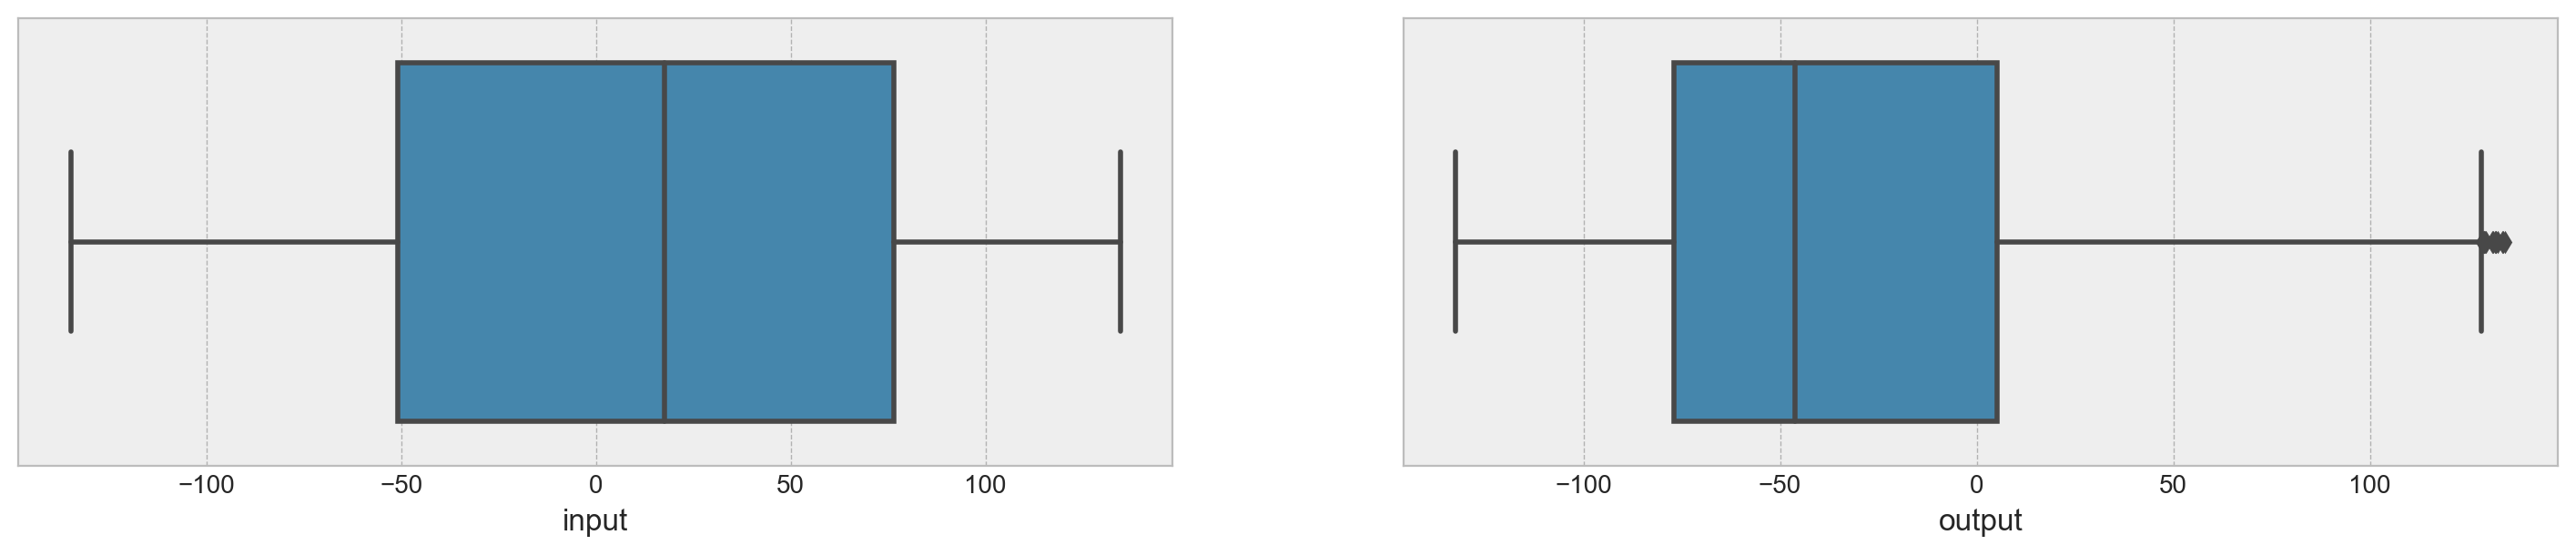

In [11]:
plt.figure(dpi=100, figsize=(18,15))

plt.subplot(421)
sns.boxplot(data=df,x='input')
            
plt.subplot(422)
sns.boxplot(data=df,x='output');

-76.9885951 -46.26979181 5.230365357
82.218960457
128.5588060425
-200.3170357855


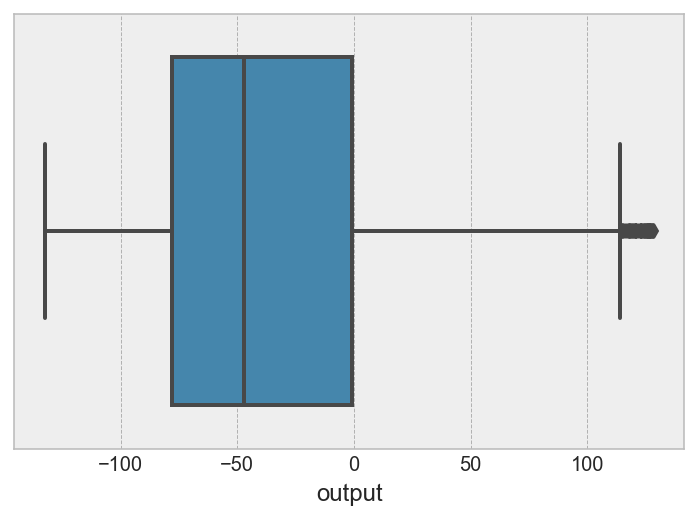

In [12]:
Q1,Q2,Q3 =tuple(df.output.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
df.output.median()
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')


drop_index=df[(df.output>UL)].index
df=df.drop(drop_index,axis=0)
sns.boxplot(data=df,x='output');

## 2. Data_Analysis:

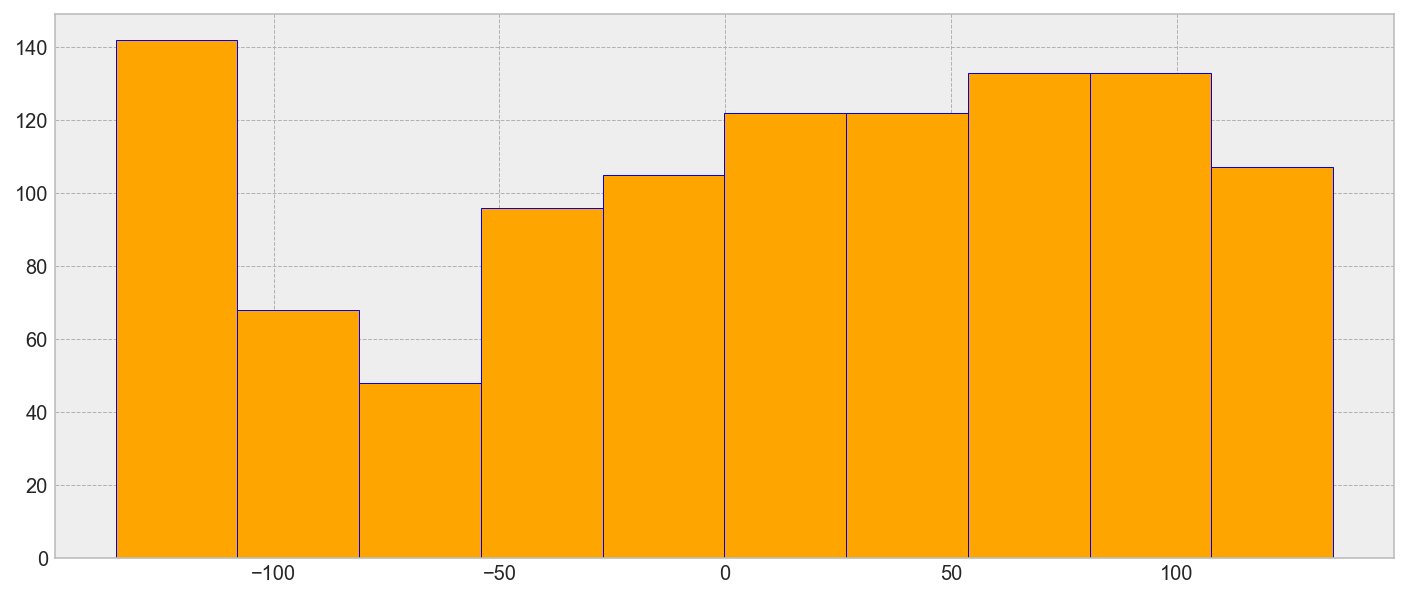

In [13]:
plt.figure(figsize=(12,5))
plt.hist(df.input,edgecolor = 'b', color= 'orange');

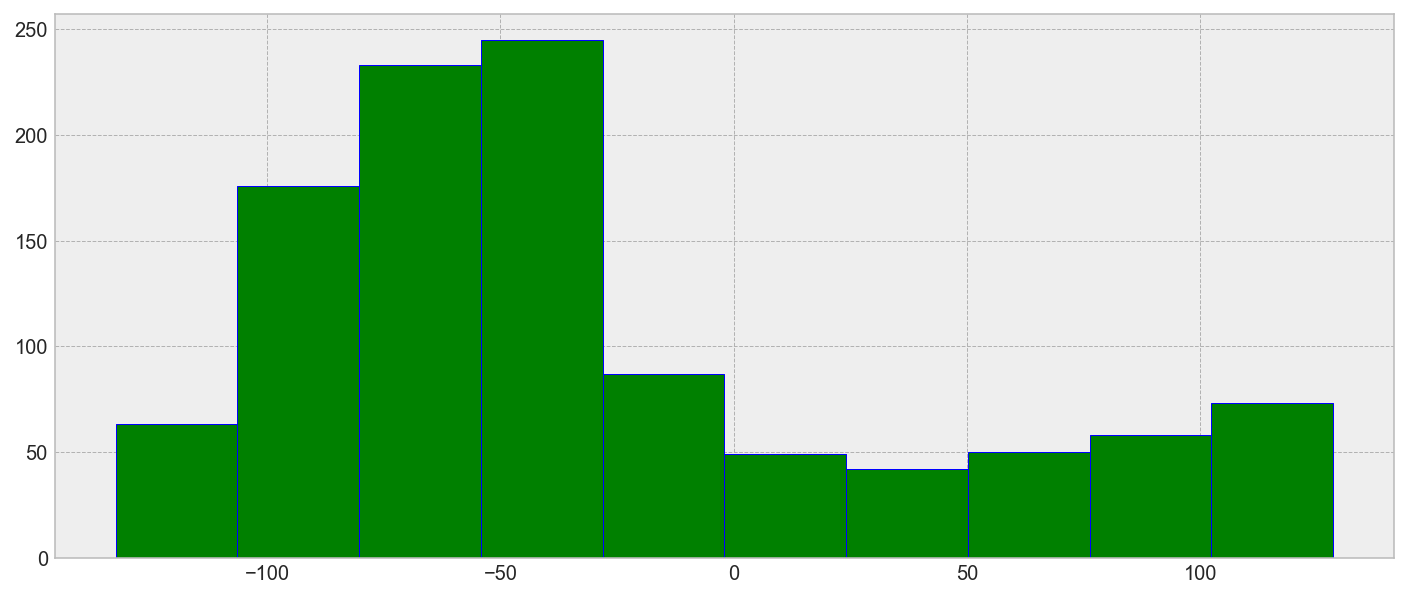

In [14]:
plt.figure(figsize=(12,5))
plt.hist(df.output,edgecolor = 'b', color= 'green');

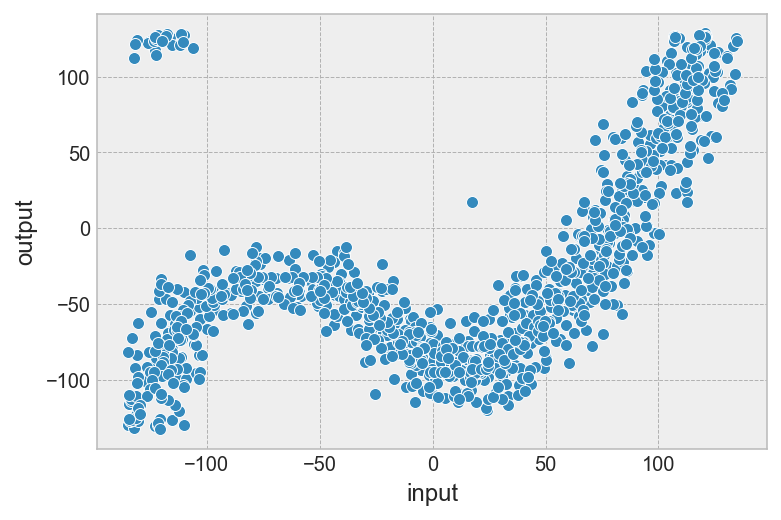

In [15]:
sns.scatterplot(data =df, x = 'input', y= 'output');

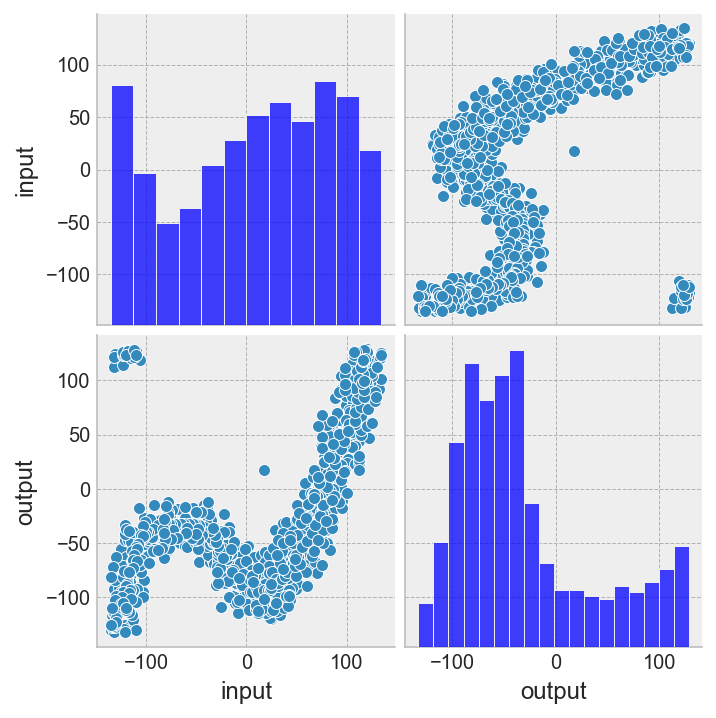

In [16]:
sns.pairplot(df);

<Figure size 1200x800 with 0 Axes>

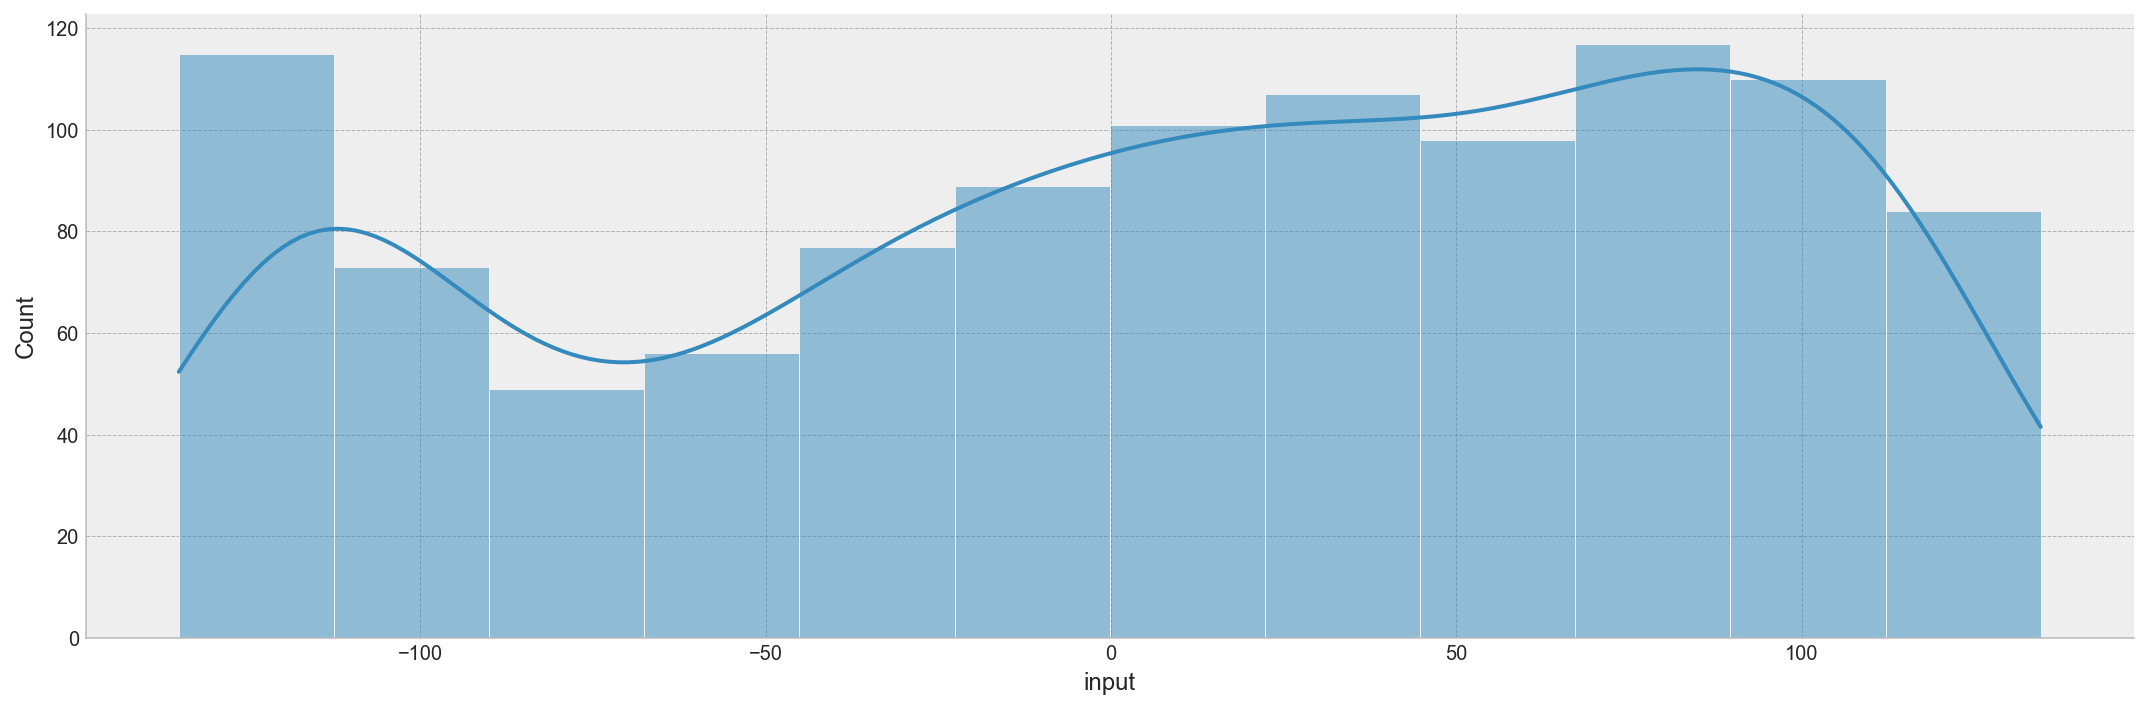

In [17]:
plt.figure(dpi = 200)
sns.displot(data = df, x = 'input', height = 5, aspect = 15/5,kde = True);

<Figure size 1200x800 with 0 Axes>

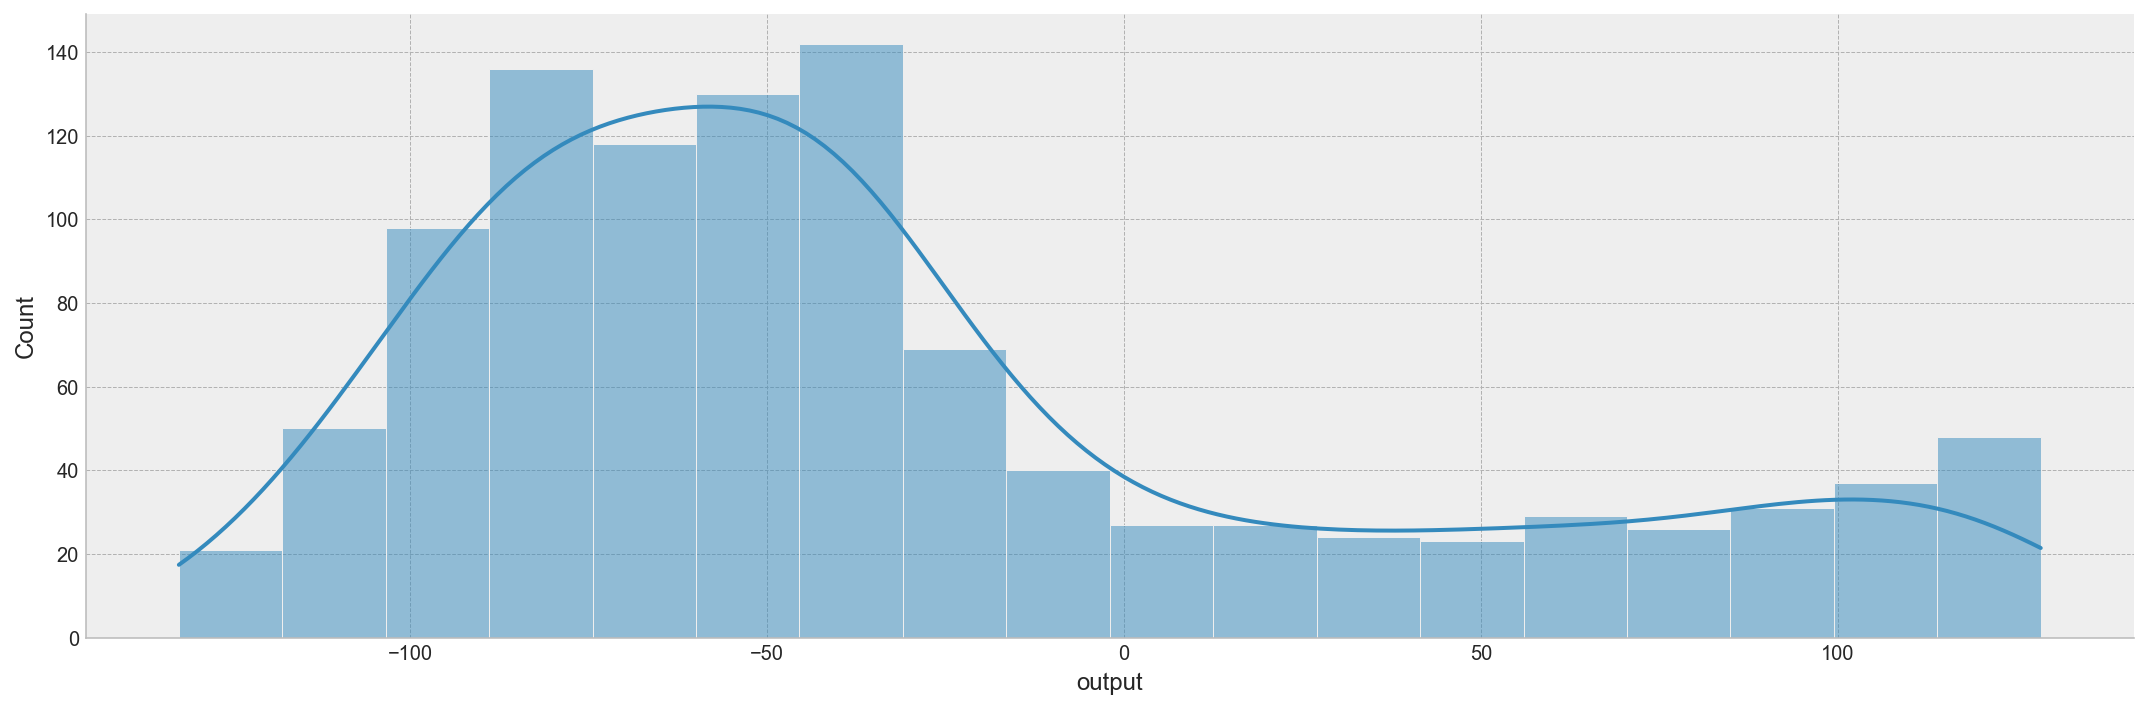

In [18]:
plt.figure(dpi = 200)
sns.displot(data = df, x = 'output', height = 5, aspect = 15/5,kde = True);

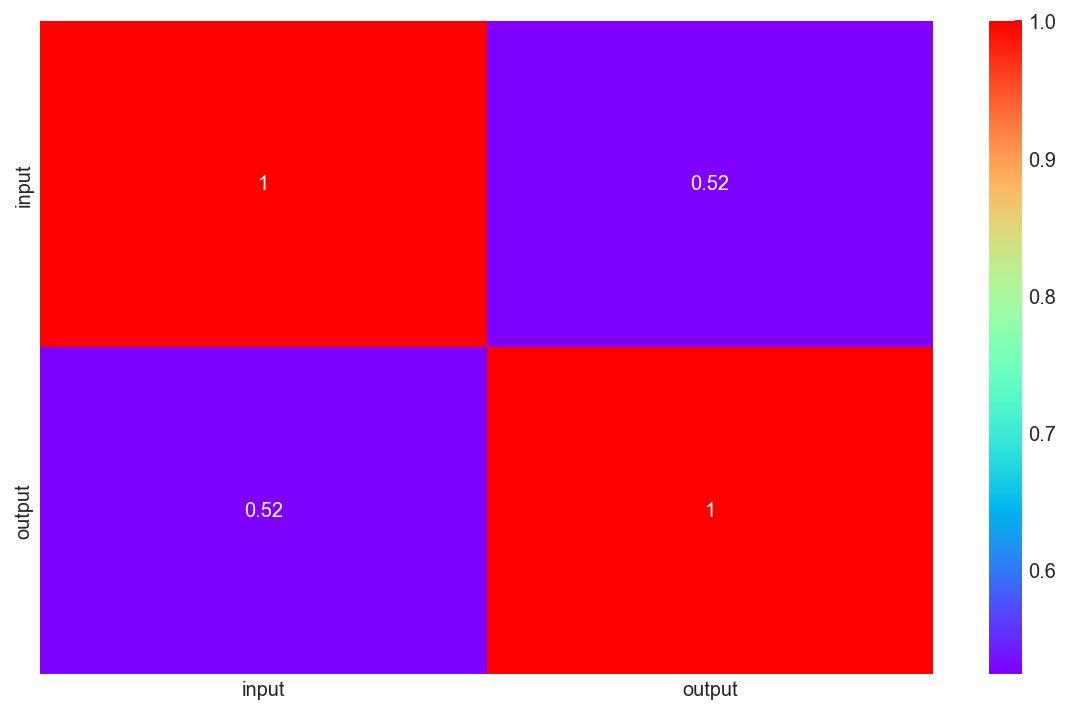

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap = 'rainbow', annot=True);

# Data Prepration:

In [20]:
df.shape

(1076, 2)

In [21]:
# Identifying the inputs (X) and output (y)

X = df[['input','output']]

y = df['output']

In [22]:
X.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [23]:
y.head()

0   -130.572085
1   -129.938929
2   -130.141832
3   -125.760932
4   -112.785214
Name: output, dtype: float64

In [24]:
# Data-preprocessing: Train & Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(753, 2) (753,)
(323, 2) (323,)


In [25]:
X_train.head()

,input,output
109,-52.825731,-17.981937
952,24.633331,-91.000000
32,-125.085620,-94.939585
569,63.860111,-48.791046
196,-13.267539,-76.478468


### 1). Data_prepration

In [26]:
# Data-preprocessing: Standardizing the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trans = scaler.fit_transform(X_train)
print(X_train_trans.shape)

(753, 2)


In [27]:
type(X_train_trans)

numpy.ndarray

In [28]:
#X_train_trans = pd.DataFrame(data=X_train_trans, columns=X_train.columns)

#X_train_trans.head()

In [29]:
X_test_trans = scaler.transform(X_test)
print(X_test_trans.shape)

(323, 2)


In [30]:
type(X_test_trans)

numpy.ndarray

In [31]:
X_test_trans = pd.DataFrame(data=X_test_trans, columns=X_test.columns)

X_test_trans.head()

,input,output
0,-0.681370,-0.202761
1,-0.701700,-0.158374
2,-1.665333,-0.916942
3,1.287901,2.267226
4,-0.082431,-0.683615


## Algorithms:

### (a). Logisticregression

In [32]:
# Learning
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train_trans, y_train)

# Prediction
y_test_pred = classifier.predict(X_test_trans)

LinearRegression()

In [33]:
Result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

Result_df.head()

,Actual,Predicted
117,-43.547685,-43.547685
165,-40.552068,-40.552068
30,-91.746958,-91.746958
1058,123.148918,123.148918
206,-76.000000,-76.000000


In [34]:
Result_df.shape

y_test.shape

Result_df.info()

(323, 2)

(323,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 117 to 785
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     323 non-null    float64
 1   Predicted  323 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB


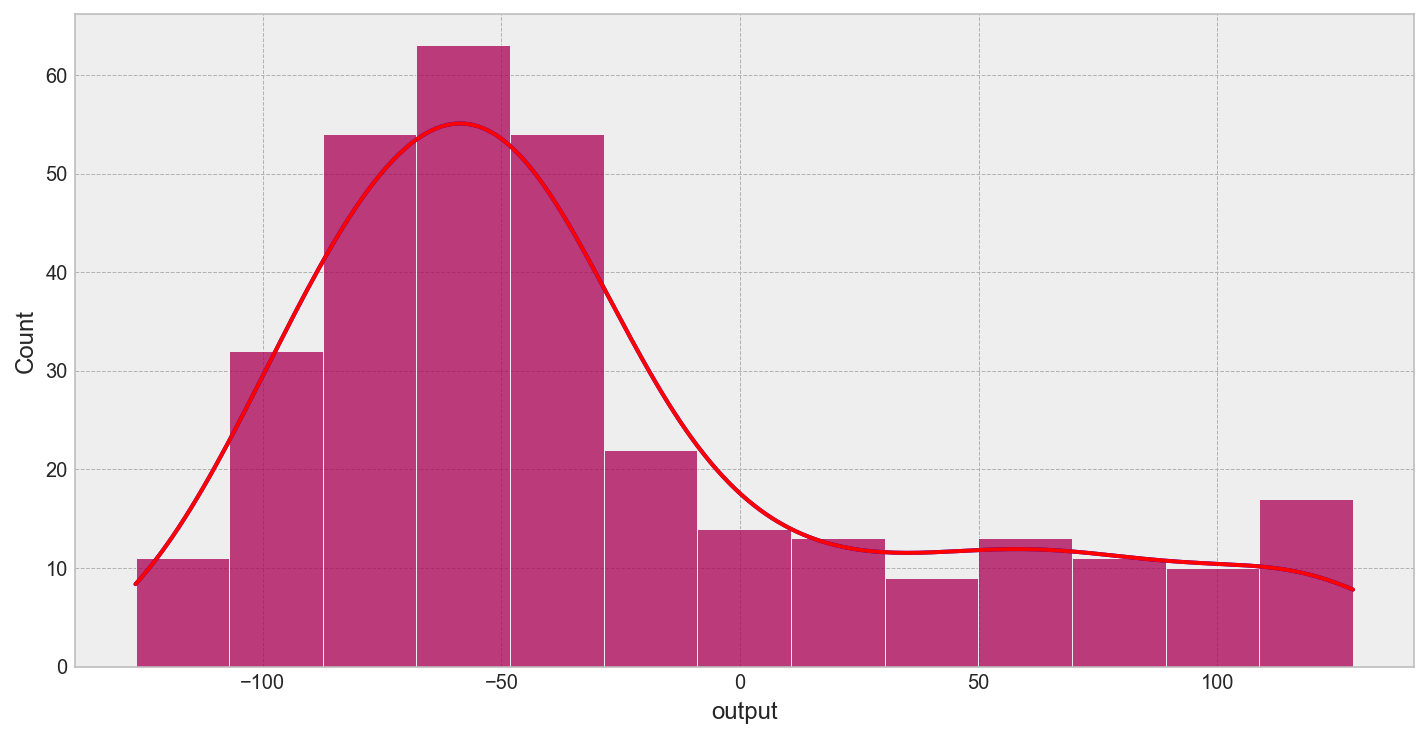

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [36]:
# Evaluation
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1.6781210064473496e-14
Mean Squared Error:  5.022786370904087e-28
Root Mean Squared Error:  2.241157373078492e-14


### (b). Decision Tree Regression

In [37]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_trans, y_train)

DecisionTreeRegressor()

In [38]:
# Prediction
y_test_pred = regressor.predict(X_test_trans)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
117,-43.547685,-43.587661
165,-40.552068,-40.537653
30,-91.746958,-91.581497
1058,123.148918,123.087950
206,-76.000000,-76.128576


In [39]:
Result_df.shape

y_test.shape

Result_df.info()

(323, 2)

(323,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 117 to 785
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     323 non-null    float64
 1   Predicted  323 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB


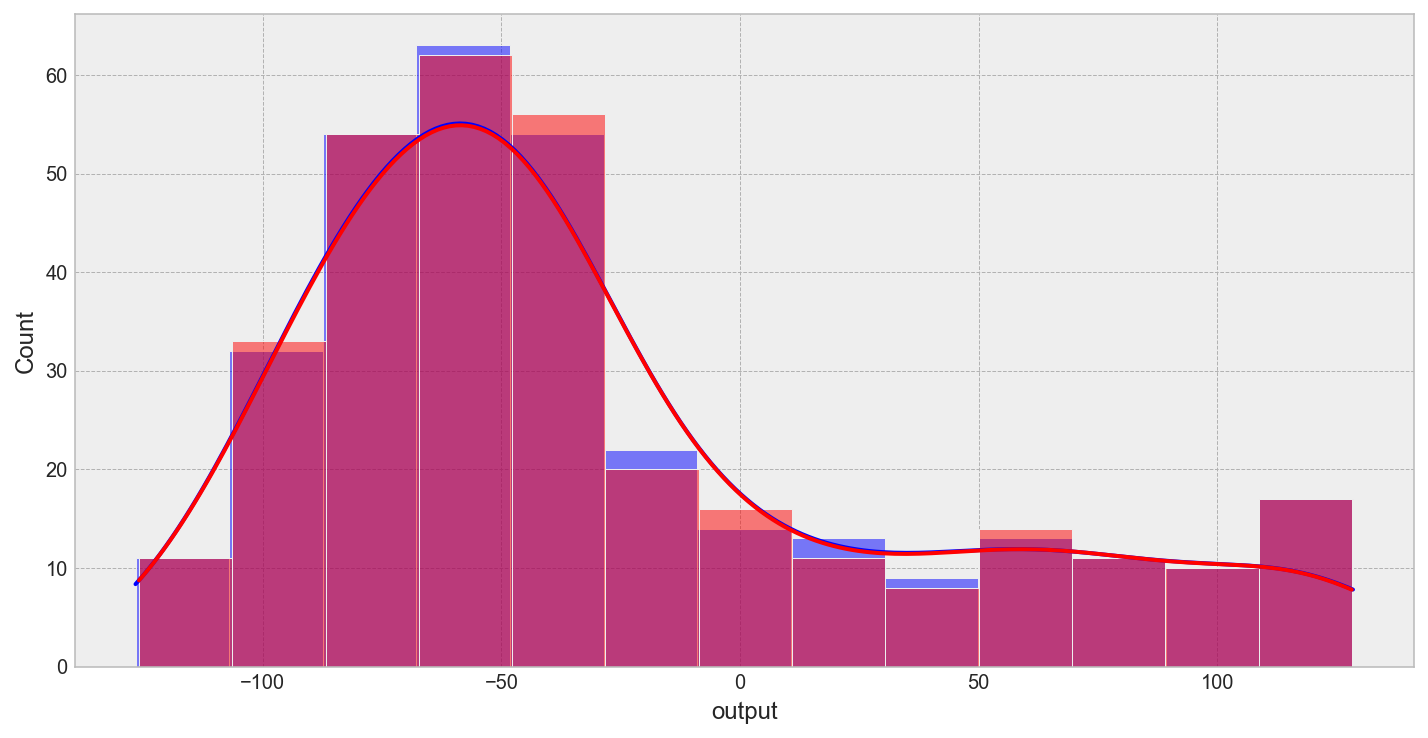

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [41]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.254588212820434
Mean Squared Error:  0.19732840131391247
Root Mean Squared Error:  0.4442166153059929


### (c). KNN Regression

In [42]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_trans, y_train)

KNeighborsRegressor()

In [43]:
# Prediction
y_test_pred = regressor.predict(X_test_trans)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
117,-43.547685,-42.839854
165,-40.552068,-40.765680
30,-91.746958,-93.271888
1058,123.148918,122.649065
206,-76.000000,-78.114810


In [44]:
Result_df.shape

y_test.shape

Result_df.info()

(323, 2)

(323,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 117 to 785
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     323 non-null    float64
 1   Predicted  323 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB


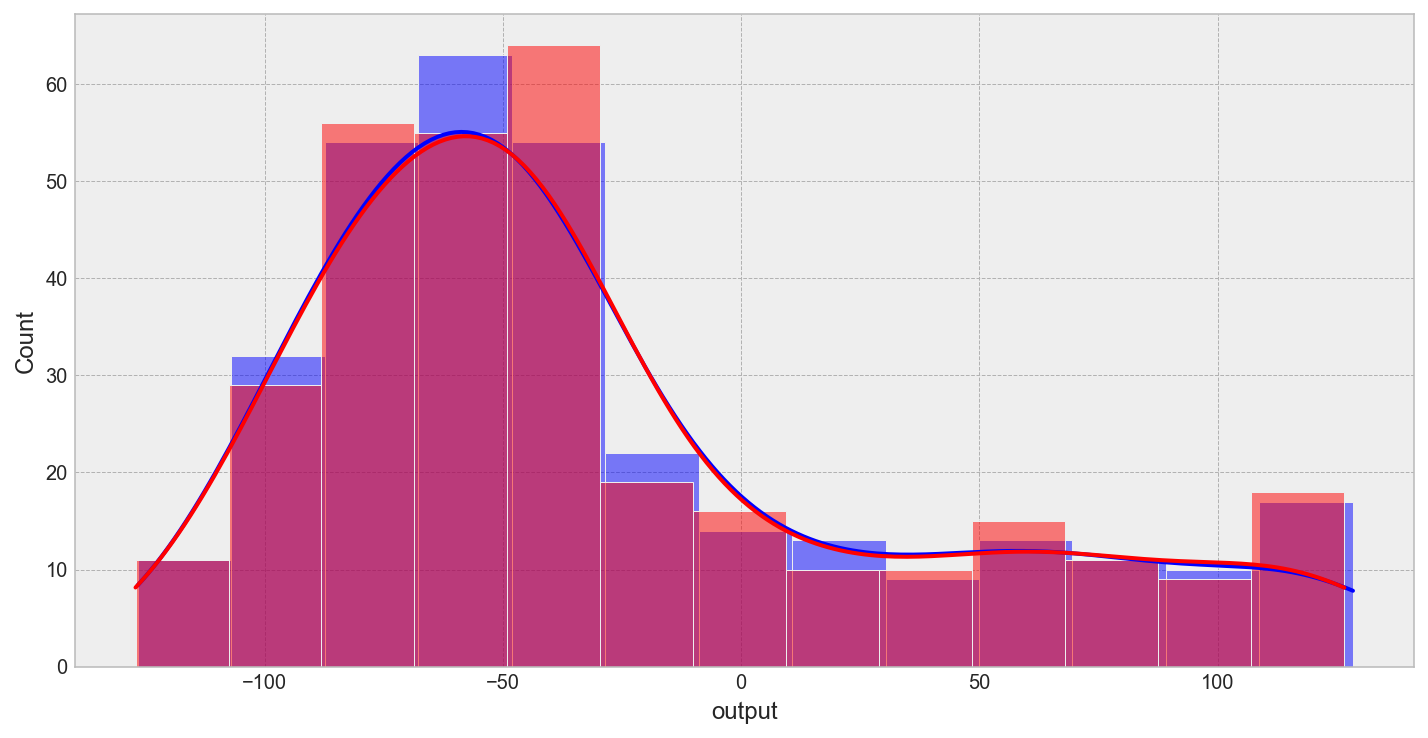

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [46]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1.3831164697845197
Mean Squared Error:  3.480457293495366
Root Mean Squared Error:  1.8655983741136157


### (d). Random Forest Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_trans, y_train)

RandomForestRegressor()

In [48]:
# Prediction
y_test_pred = regressor.predict(X_test_trans)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
117,-43.547685,-43.572175
165,-40.552068,-40.521345
30,-91.746958,-91.702116
1058,123.148918,122.936415
206,-76.000000,-76.045804


In [49]:
Result_df.shape

y_test.shape

Result_df.info()

(323, 2)

(323,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 117 to 785
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     323 non-null    float64
 1   Predicted  323 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB


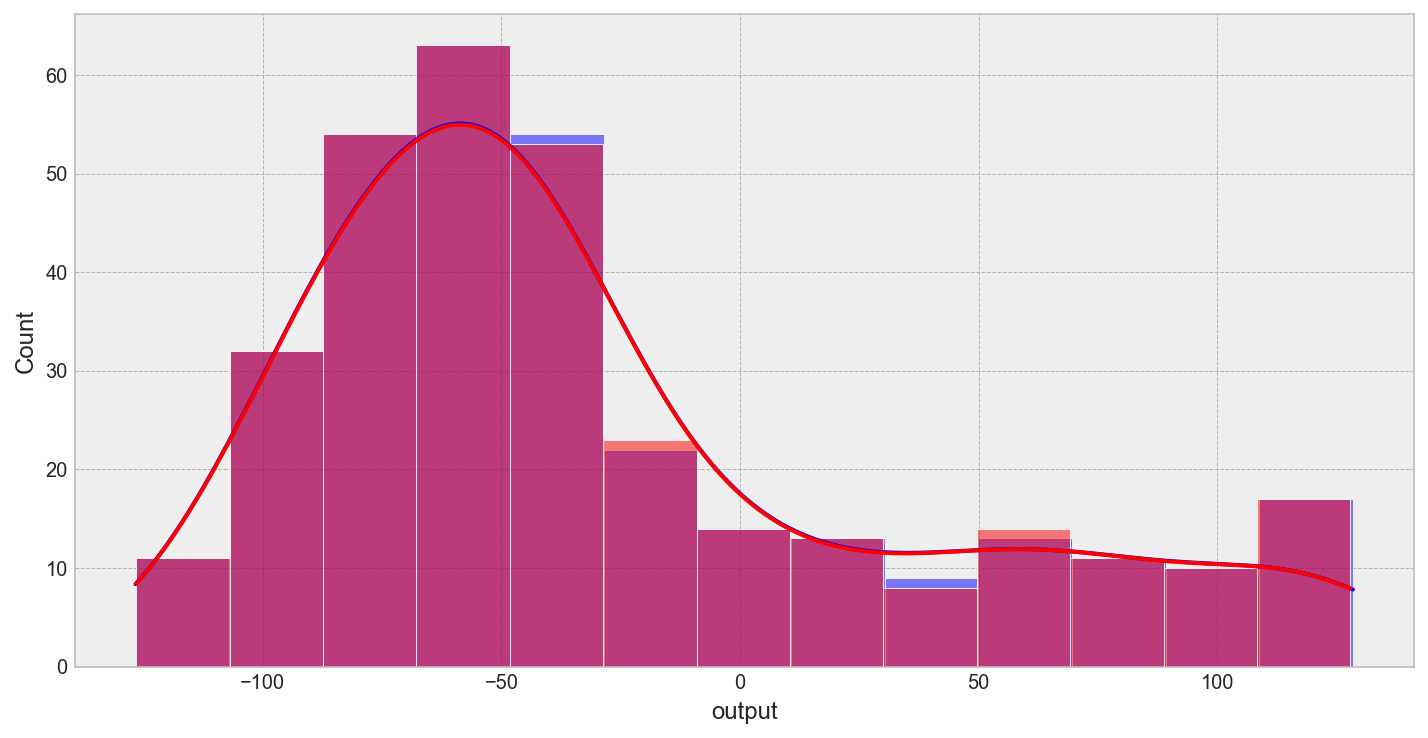

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [51]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.16782243249795925
Mean Squared Error:  0.07494844367574485
Root Mean Squared Error:  0.2737671340313604


### (e). VotingRegressor Regression

In [52]:
from sklearn.ensemble import VotingRegressor
regressor = VotingRegressor([('lr', regressor), ('rf', regressor), ('r3', regressor)])
regressor.fit(X_train_trans, y_train)

VotingRegressor(estimators=[('lr', RandomForestRegressor()),
                            ('rf', RandomForestRegressor()),
                            ('r3', RandomForestRegressor())])

In [53]:
# Prediction
y_test_pred = regressor.predict(X_test_trans)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
117,-43.547685,-43.525524
165,-40.552068,-40.531679
30,-91.746958,-91.744141
1058,123.148918,122.996639
206,-76.000000,-76.060582


In [54]:
Result_df.shape

y_test.shape

Result_df.info()

(323, 2)

(323,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 117 to 785
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     323 non-null    float64
 1   Predicted  323 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB


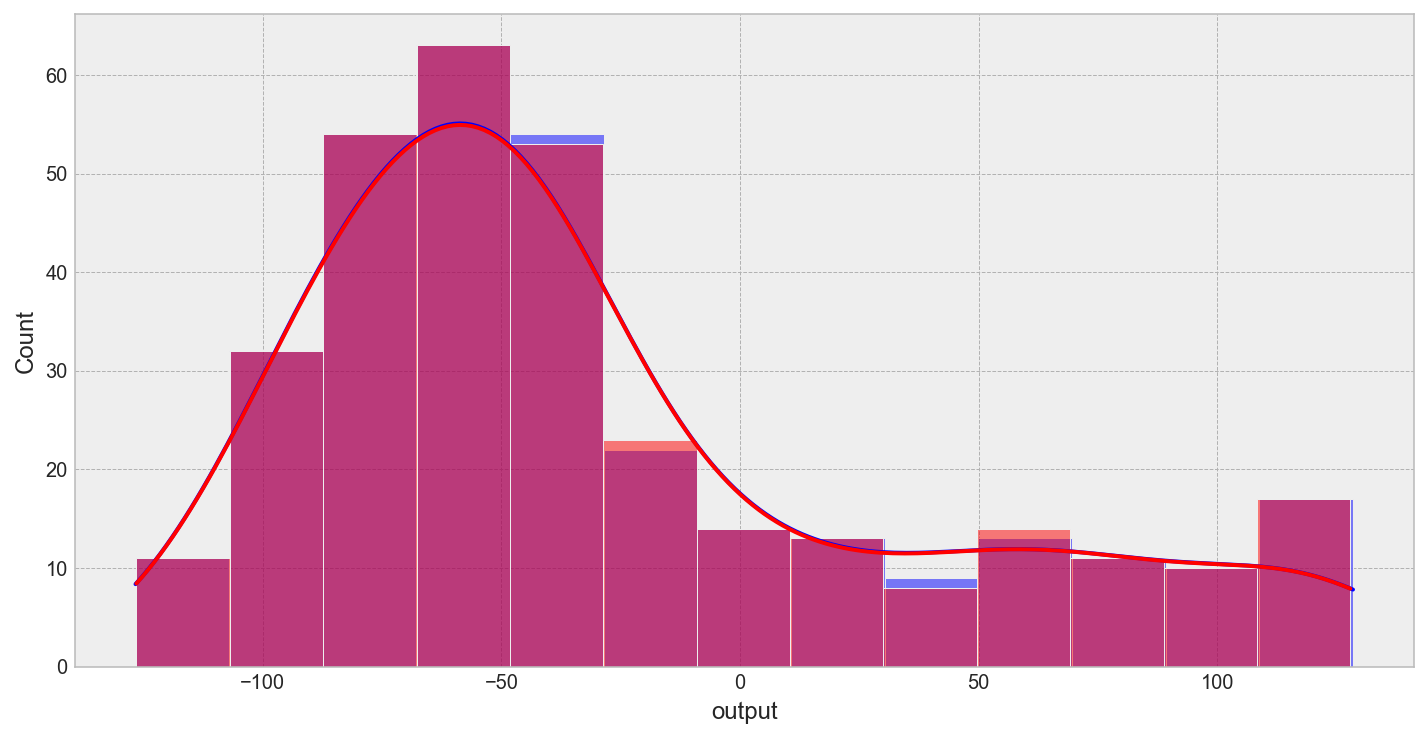

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [56]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.16826950949687405
Mean Squared Error:  0.07220865257515659
Root Mean Squared Error:  0.26871667714370945


### (f). GradientBoostingRegressor Regression

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_trans, y_train)

GradientBoostingRegressor()

In [58]:
# Prediction
y_test_pred = regressor.predict(X_test_trans)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
117,-43.547685,-43.868347
165,-40.552068,-40.771368
30,-91.746958,-92.281954
1058,123.148918,123.068910
206,-76.000000,-75.977485
1103,125.834014,125.715012
541,-4.065554,-2.609525
134,-41.000000,-41.012216
19,-85.090711,-84.263569
156,-49.286316,-48.691661


In [59]:
Result_df.shape

y_test.shape

Result_df.info()

(323, 2)

(323,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 117 to 785
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     323 non-null    float64
 1   Predicted  323 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB


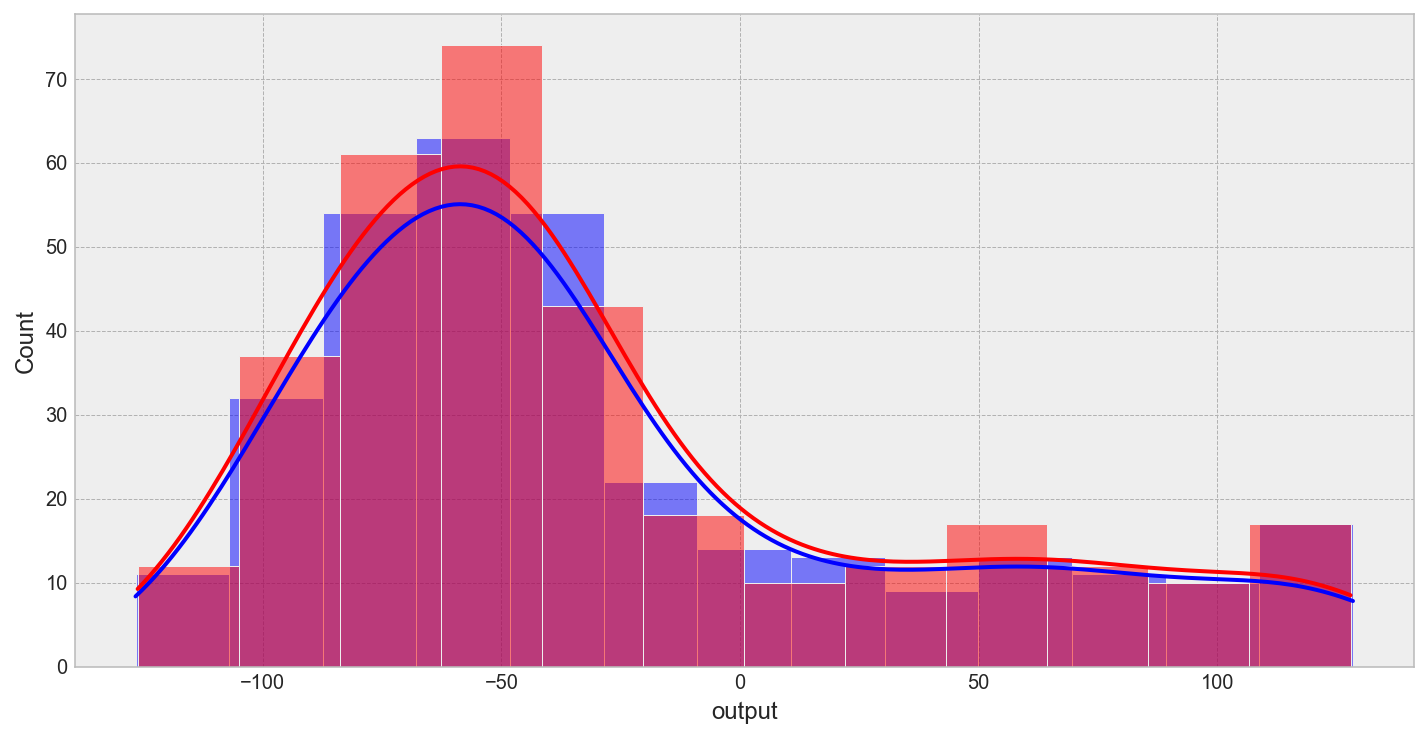

In [60]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [61]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.4141646670530306
Mean Squared Error:  0.29414993426816083
Root Mean Squared Error:  0.5423559110659354


### (g). AdaBoostRegressor Regression

In [62]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(X_train_trans, y_train)

AdaBoostRegressor()

In [63]:
# Prediction
y_test_pred = regressor.predict(X_test_trans)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
117,-43.547685,-42.919634
165,-40.552068,-41.819782
30,-91.746958,-91.310129
1058,123.148918,114.774899
206,-76.000000,-82.861213
1103,125.834014,114.774899
541,-4.065554,-9.486718
134,-41.000000,-41.819782
19,-85.090711,-87.947360
156,-49.286316,-50.383399


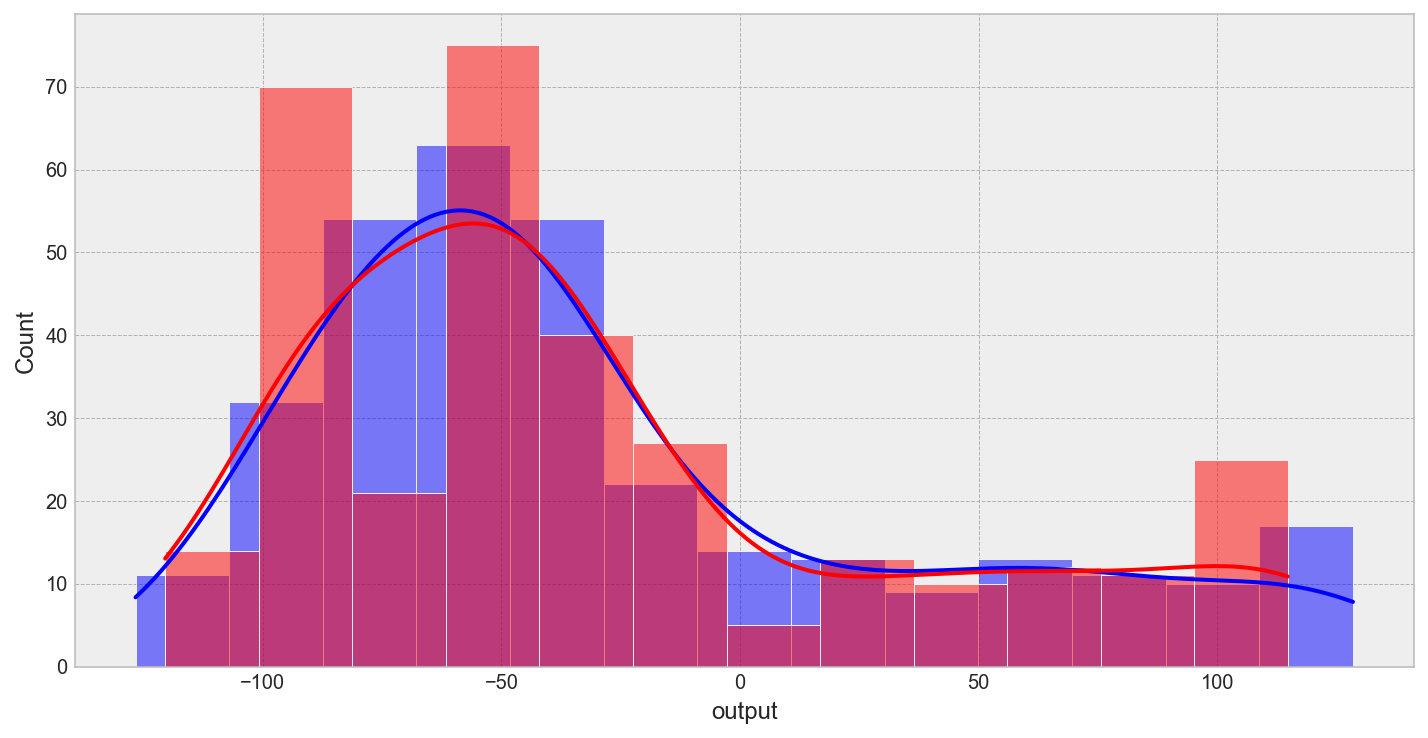

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [65]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3.5597778850669375
Mean Squared Error:  21.907059112245193
Root Mean Squared Error:  4.680497741933564


### (h). ExtraTreesRegressor Regression

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor()
regressor.fit(X_train_trans, y_train)

ExtraTreesRegressor()

In [67]:
# Prediction
y_test_pred = regressor.predict(X_test_trans)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
117,-43.547685,-43.543665
165,-40.552068,-40.546493
30,-91.746958,-91.694470
1058,123.148918,123.238049
206,-76.000000,-75.995084
1103,125.834014,125.655659
541,-4.065554,-4.183820
134,-41.000000,-41.003393
19,-85.090711,-84.976455
156,-49.286316,-49.392987


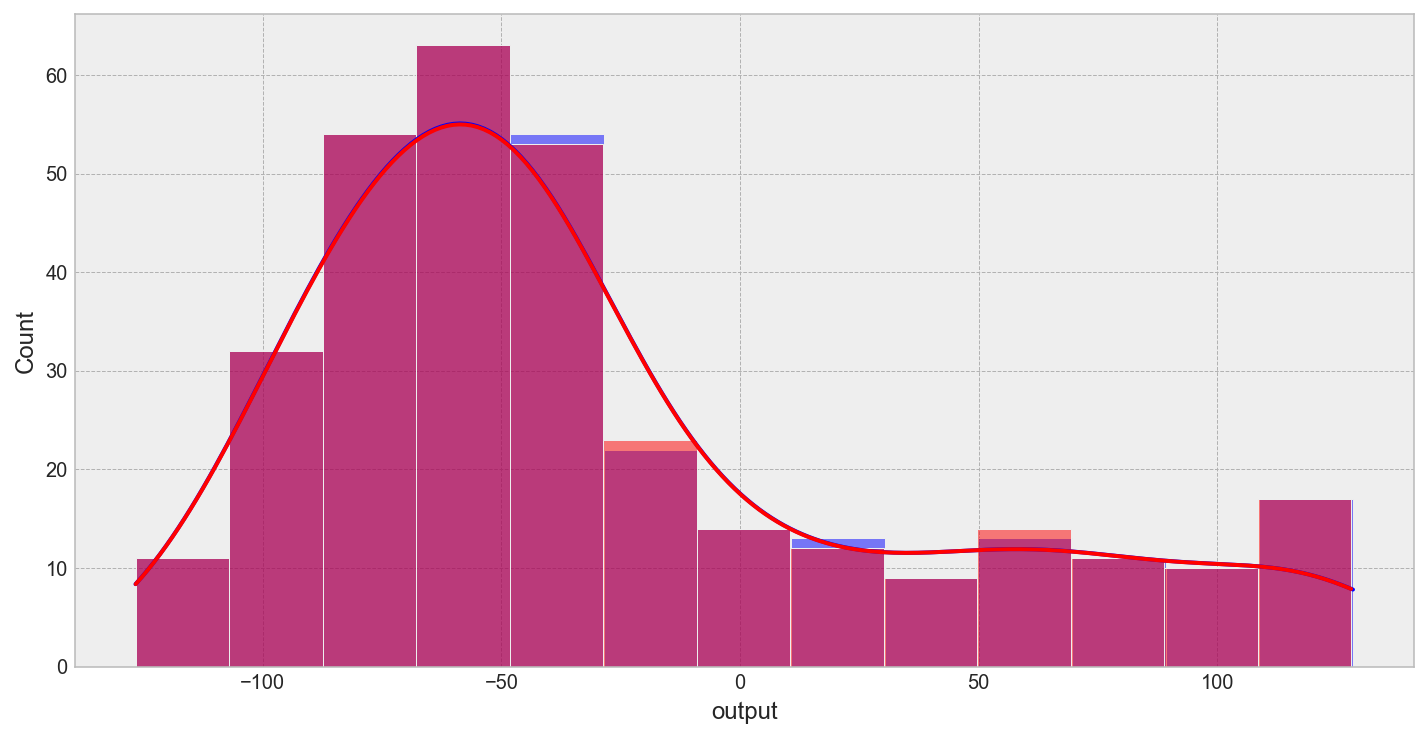

In [68]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [69]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.07081672876219543
Mean Squared Error:  0.017476891884162925
Root Mean Squared Error:  0.1322001962334509


### (i). SVR Regression

In [70]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_trans, y_train)

SVR()

In [71]:
# Prediction
y_test_pred = regressor.predict(X_test_trans)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
117,-43.547685,-43.045656
165,-40.552068,-40.010206
30,-91.746958,-79.972621
1058,123.148918,69.348142
206,-76.000000,-77.002195
1103,125.834014,2.584491
541,-4.065554,-4.525799
134,-41.000000,-40.454212
19,-85.090711,-78.890452
156,-49.286316,-48.940559


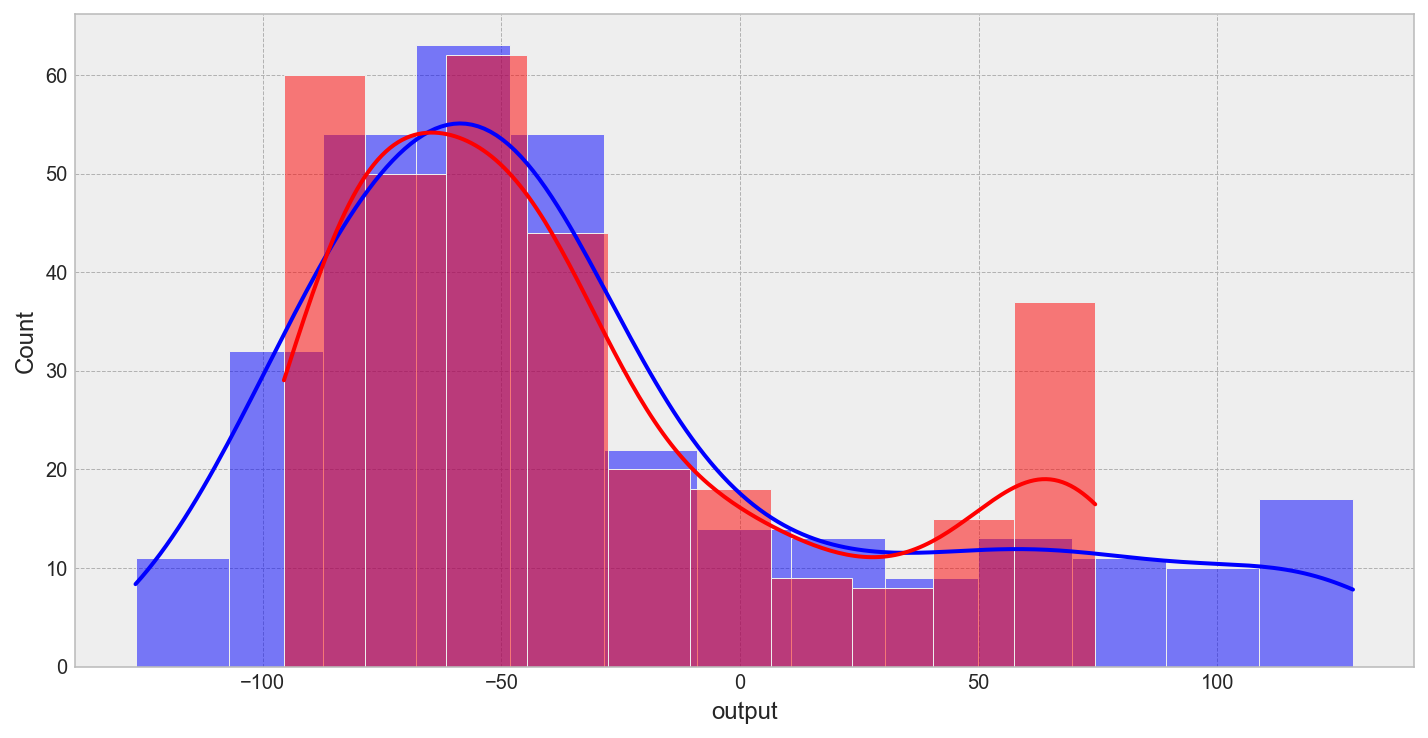

In [72]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde='True')
sns.histplot(y_test_pred, color='red', alpha=0.5, kde='True');

In [73]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  7.53163175018839
Mean Squared Error:  427.99247892912524
Root Mean Squared Error:  20.68797909243736


In [78]:
df1 = {'Best_algorithims' : ['7','4','6','3','2','5','8','1','9'],
       'Regression_algorithm':['LinearRegression Regression','DecisionTreeRegressor Regression','KNeighborsRegressor Regression',
                        'RandomForestRegressor Regression','VotingRegressor Regression','GradientBoostingRegressor Regression',
                       'AdaBoostRegressor Regression','ExtraTreesRegressor Regression','SVR Regression'],
       'Mean_absolute_error' : ['1.678','0.275','1.383','0.172','0.167','0.414','3.092','0.081','7.531']}

Result = pd.DataFrame(df1, columns = ['Best_algorithims','Regression_algorithm','Mean_absolute_error'])
Result

,Best_algorithims,Regression_algorithm,Mean_absolute_error
0,7,LinearRegression Regression,1.678
1,4,DecisionTreeRegressor Regression,0.275
2,6,KNeighborsRegressor Regression,1.383
3,3,RandomForestRegressor Regression,0.172
4,2,VotingRegressor Regression,0.167
5,5,GradientBoostingRegressor Regression,0.414
6,8,AdaBoostRegressor Regression,3.092
7,1,ExtraTreesRegressor Regression,0.081
8,9,SVR Regression,7.531


(1). **After removing outliers i conclude that ExtraTreesRegressor Regression model is best fit model for the prediction**

(2)From the avobe senario we conclude that **ExtraTreesRegressor Regression** predicting more accuratly with less amount of **mean absolute error:0.081** than any other model